<a href="https://colab.research.google.com/github/2412tessa-gif/UM-MSP-BIGDATAINPHYSICS/blob/main/exercise_part_0_introduction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Track reconstruction
=================

For all the exercises in today's lab, we will be using a well-known pattern recognition problem that arises in particle physics experiments.

After particles leave traces in a detector, it is useful to find the trajectories that particles described as they passed through the detector. **Track reconstruction** consists in associating the fired hits (the *tracks*) in a detector that belong to each individual particle.

Track reconstruction yields interesting information about the particles, such as their trajectory, momenta and charge. Tracks are typically not reconstructed in one go however, but instead the problem is simplified into several parts that match geometrically to the conditions of the detector.

Let's see one example of tracking right away. From the image on the left with hits, we should separate the hits in *tracks* which represent particle trajectories, like the image on the right:

<img src="docs/example_track_reco.png" alt="Velopix reconstruction example" style="width: 600px;"/>

We will be looking at a specific track reconstruction problem: the one that occurs in the LHCb detector at CERN. Concretely, the [VELO pixel subdetector](https://lhcb-public.web.cern.ch/en/detector/VELO-en.html) consists of 52 modules, each of them with three silicon chips that detect particles as "pixels" in an array.

<img src="docs/velopix_front.png" alt="Velopix subdetector" />

Exercise 1
---------------

First, let's take some Monte Carlo simulated data to play with. This is a wider practice than what you may initially think: simulated data are used to develop and validate algorithms long before the detector hardware even exists. It can also help drive the decision of how the detector should be made!

In [ ]:
# Run this only once
!git clone https://github.com/dcampora/velopix_tracking.git

fatal: destination path 'velopix_tracking' already exists and is not an empty directory.


Alongside the project you just fetched are 10 events to play with. They are encoded in the json format, and the python library "json" knows just how to handle them:

In [ ]:
import sys, os
sys.path.append(os.getcwd() + "/../")
sys.path.append(os.getcwd() + "/velopix_tracking/")

import json
from event_model import event_model as em

f = open("velopix_tracking/events/velo_event_0.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

You now have loaded onto memory an `event`. An event is LHC jargon for a bunch crossing, a 25-nanosecond window where particles collided and stuff happened. Let's start by inspecting what we can do with this event.

* Find out what you can do with the `event`.

In [ ]:
event.number_of_hits

996

In [ ]:
event.number_of_modules

52

In [ ]:
event.modules

[module 0:
  At z: {-288.08, -286.918}
  Number of hits: 20
  Hits (#id {x, y, z}): [#0 module 0 {9.18, -30.509, -288.08}, #1 module 0 {-9.137, -12.308, -288.08}, #2 module 0 {-8.806, -8.711, -288.08}, #3 module 0 {-9.623, -5.171, -288.08}, #4 module 0 {-21.73, -20.093, -286.918}, #5 module 0 {-16.422, -19.918, -286.918}, #6 module 0 {-12.455, -24.43, -286.918}, #7 module 0 {-11.832, -24.818, -286.918}, #8 module 0 {-7.827, -28.124, -286.918}, #9 module 0 {8.759, -44.478, -286.918}, #10 module 0 {-5.415, -22.407, -286.918}, #11 module 0 {-4.365, -34.152, -286.918}, #12 module 0 {-7.574, -37.711, -286.918}, #13 module 0 {-7.418, -37.75, -286.918}, #14 module 0 {-5.424, 6.221, -286.918}, #15 module 0 {-11.005, 11.49, -286.918}, #16 module 0 {-28.292, -8.771, -286.918}, #17 module 0 {-39.789, 6.663, -288.08}, #18 module 0 {-33.795, 2.468, -288.08}, #19 module 0 {-15.458, 15.438, -288.08}],
 module 1:
  At z: {-275.58, -274.418}
  Number of hits: 37
  Hits (#id {x, y, z}): [#20 module 1 {-

As was said in the introduction, there should be 52 modules available.

* Find out what you can do with a module.
* Print modules 0, 2 and 4.

In [ ]:
print(event.modules[0])
print(event.modules[2])
print(event.modules[4])

module 0:
 At z: {-288.08, -286.918}
 Number of hits: 20
 Hits (#id {x, y, z}): [#0 module 0 {9.18, -30.509, -288.08}, #1 module 0 {-9.137, -12.308, -288.08}, #2 module 0 {-8.806, -8.711, -288.08}, #3 module 0 {-9.623, -5.171, -288.08}, #4 module 0 {-21.73, -20.093, -286.918}, #5 module 0 {-16.422, -19.918, -286.918}, #6 module 0 {-12.455, -24.43, -286.918}, #7 module 0 {-11.832, -24.818, -286.918}, #8 module 0 {-7.827, -28.124, -286.918}, #9 module 0 {8.759, -44.478, -286.918}, #10 module 0 {-5.415, -22.407, -286.918}, #11 module 0 {-4.365, -34.152, -286.918}, #12 module 0 {-7.574, -37.711, -286.918}, #13 module 0 {-7.418, -37.75, -286.918}, #14 module 0 {-5.424, 6.221, -286.918}, #15 module 0 {-11.005, 11.49, -286.918}, #16 module 0 {-28.292, -8.771, -286.918}, #17 module 0 {-39.789, 6.663, -288.08}, #18 module 0 {-33.795, 2.468, -288.08}, #19 module 0 {-15.458, 15.438, -288.08}]
module 2:
 At z: {-263.08, -261.918}
 Number of hits: 21
 Hits (#id {x, y, z}): [#57 module 2 {8.499, -28

Each module has a number of hits, which represent the fired signals that were left by the (simulated) charged particles as they crossed them.

* Printing the module showed all the hits... but anyway, print all hits for module 0, this time iterating through the hits yourself.
* What are the minimum and maximum values of X, Y and Z of all hits in the module?

lmj try this

In [ ]:
hits = event.modules[0].hits() #make variable hits(from module zero in the event)

x = [] #seperate x, y, z variables
y = []
z = []

for hit in hits: #print every hit from the list hits
    print(hit)
    x.append(hit.x)  # extract x coordinate
    y.append(hit.y)  # extract y coordinate
    z.append(hit.z)  # extract z coordinate

x_max, x_min = max(x), min(x)

y_max, y_min = max(y), min(y)

z_max, z_min = max(z), min(z)

print("The max variable in the X is", x_max, "the min variable in the X list is", x_min)
print("The max variable in the Y is", y_max, "the min variable in the Y list is", y_min)
print("The max variable in the Z is", z_max, "the min variable in the Z list is", z_min)


#0 module 0 {9.18, -30.509, -288.08}
#1 module 0 {-9.137, -12.308, -288.08}
#2 module 0 {-8.806, -8.711, -288.08}
#3 module 0 {-9.623, -5.171, -288.08}
#4 module 0 {-21.73, -20.093, -286.918}
#5 module 0 {-16.422, -19.918, -286.918}
#6 module 0 {-12.455, -24.43, -286.918}
#7 module 0 {-11.832, -24.818, -286.918}
#8 module 0 {-7.827, -28.124, -286.918}
#9 module 0 {8.759, -44.478, -286.918}
#10 module 0 {-5.415, -22.407, -286.918}
#11 module 0 {-4.365, -34.152, -286.918}
#12 module 0 {-7.574, -37.711, -286.918}
#13 module 0 {-7.418, -37.75, -286.918}
#14 module 0 {-5.424, 6.221, -286.918}
#15 module 0 {-11.005, 11.49, -286.918}
#16 module 0 {-28.292, -8.771, -286.918}
#17 module 0 {-39.789, 6.663, -288.08}
#18 module 0 {-33.795, 2.468, -288.08}
#19 module 0 {-15.458, 15.438, -288.08}
The max variable in the X is 9.18 the min variable in the X list is -39.789
The max variable in the Y is 15.438 the min variable in the Y list is -44.478
The max variable in the Z is -286.918 the min variab

Exercise 2
---------------

Let's start by visualizing the event that you were inspecting all along.

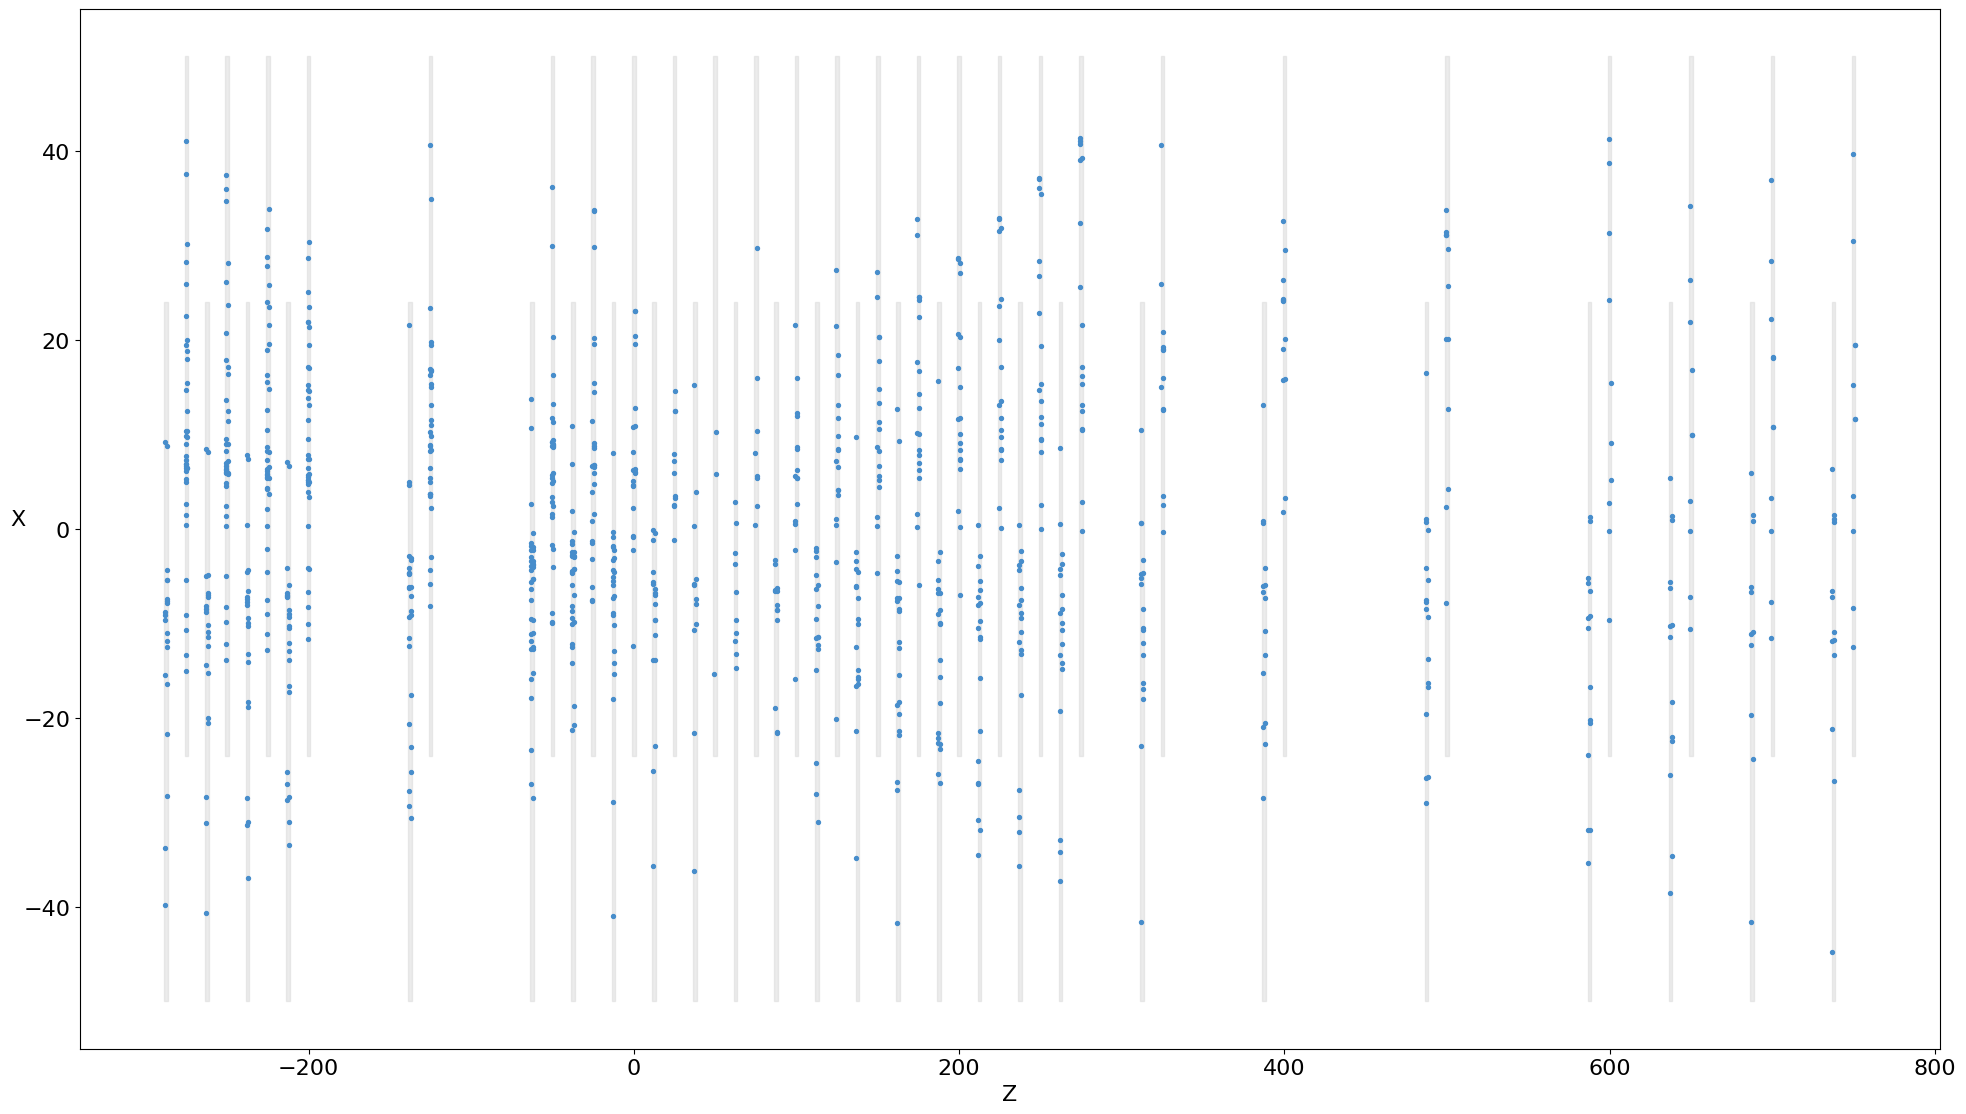

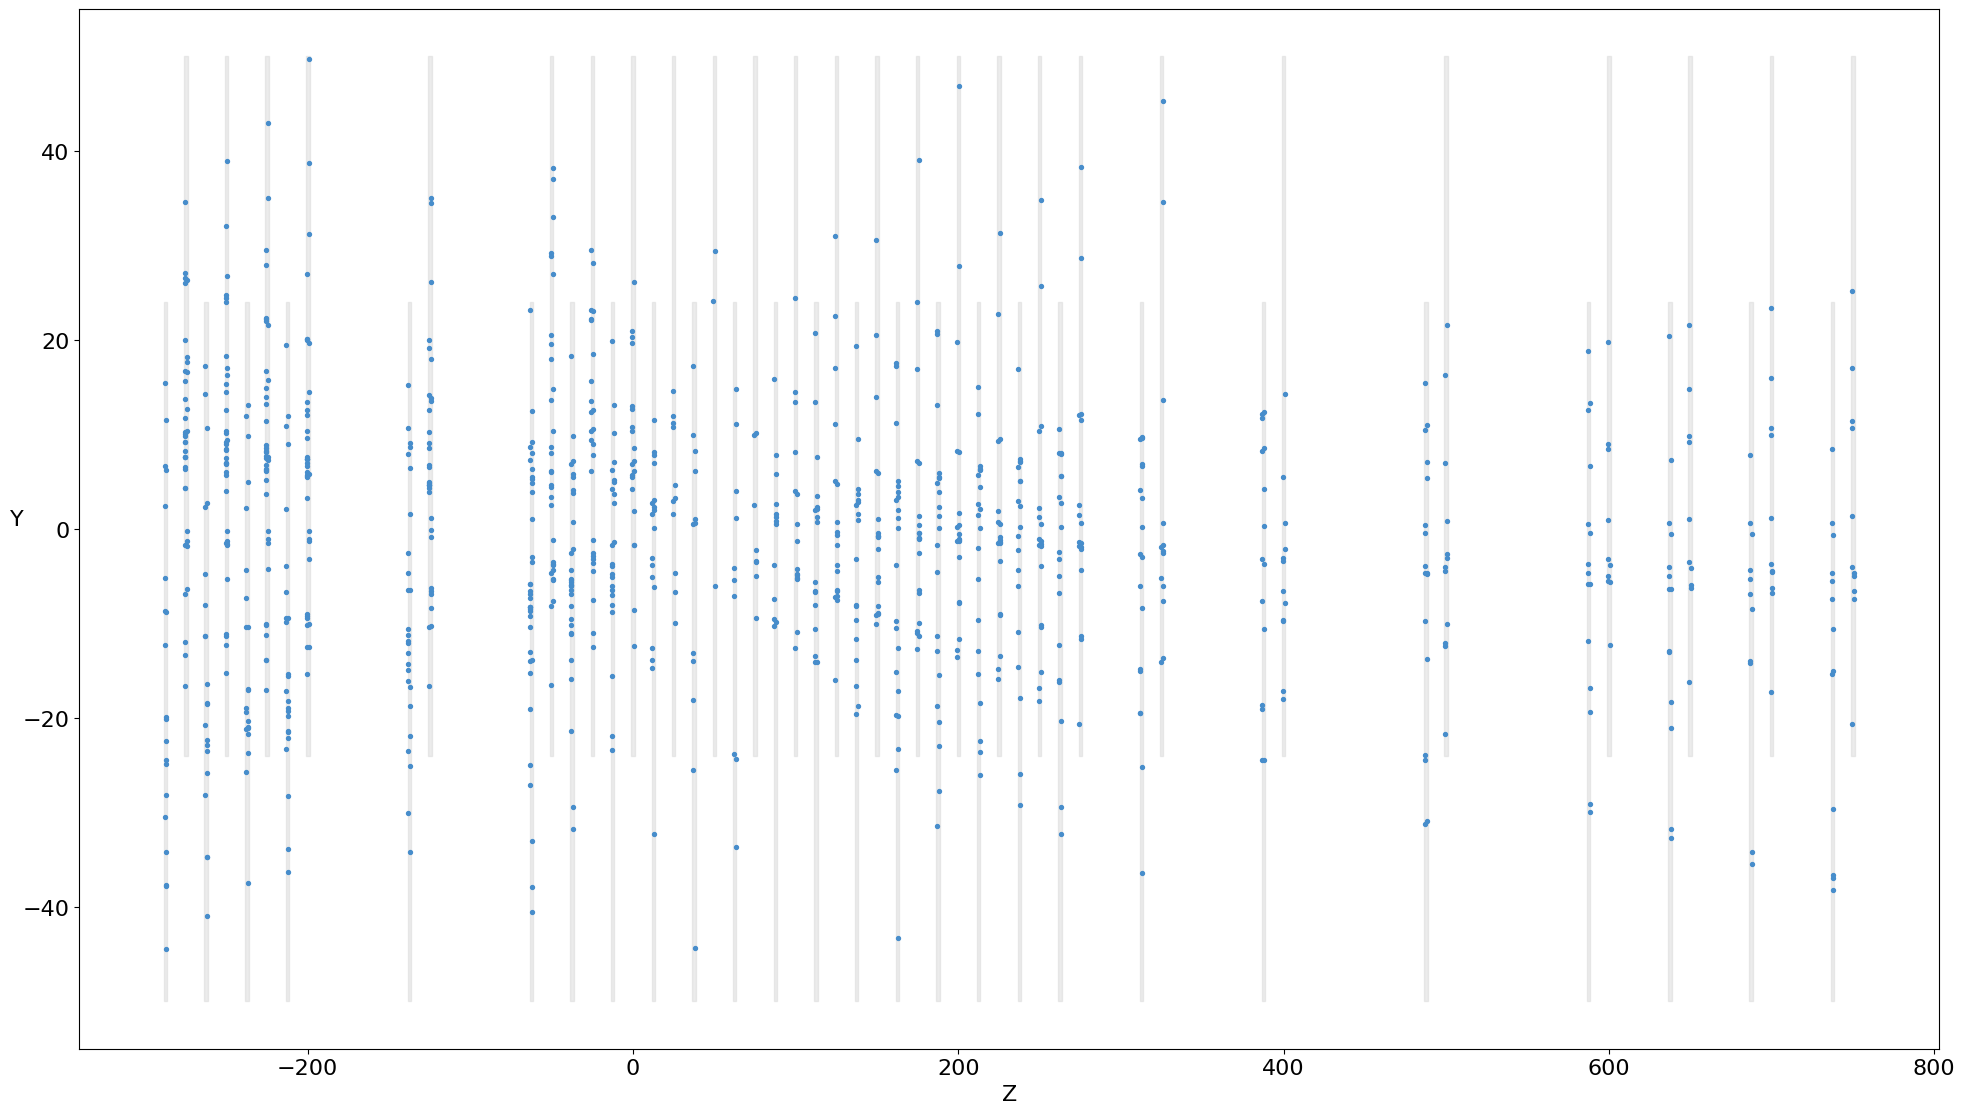

In [ ]:
from visual.base import print_event_2d
%matplotlib inline

print_event_2d(event)
print_event_2d(event, y=1)

You may use the `print_event_2d` to... wait, you can do this too:

* Use the function `help` to find out what you can do with the `print_event_2d` function.
* Print only modules `0, 2, 4` of the event.

Help on function print_event_2d in module visual.base:

print_event_2d(event, tracks=[], x=2, y=0, track_color=0, filename='visual.png', save_to_file=False, modules=[])
    A function to print events. It produces a 2D plot
    and either prints or saves it to a file.

    Arguments
    ---------

    event : the event to be printed
    modules : list of modules to be printed
    tracks : tracks to print
    track_color : color of tracks (in 0-20 range)
    x : index to be used as x axis
    y : index to be used as y axis
    save_to_file : switches between saving output to file or showing it (default)
    filename : file where to save visualization



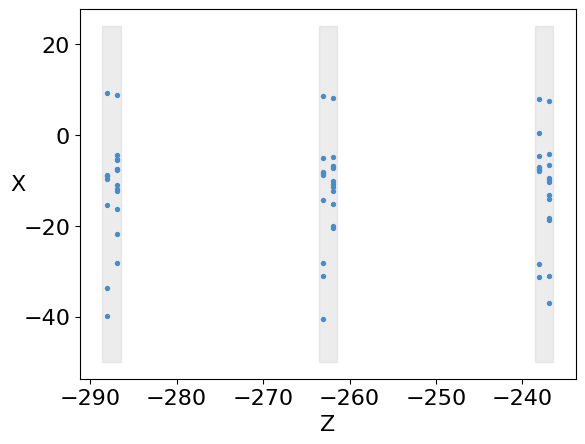

In [ ]:
help(print_event_2d)
print_event_2d(event, modules=[0, 2, 4])

You can now create some tracks. In this simplistic python *event model* the type `em.track` expects a list of hits. A track is simply a list of hits.

* Create some `track`s with hits from modules `0, 2, 4`. A track should typically contain at least three hits, and not contain any hits from the same module.
* Visualize modules `0, 2, 4` with the tracks you have created.
* How many tracks could you create with hits from these modules?
* How many tracks with no overlapping hits could you create with hits from these modules?

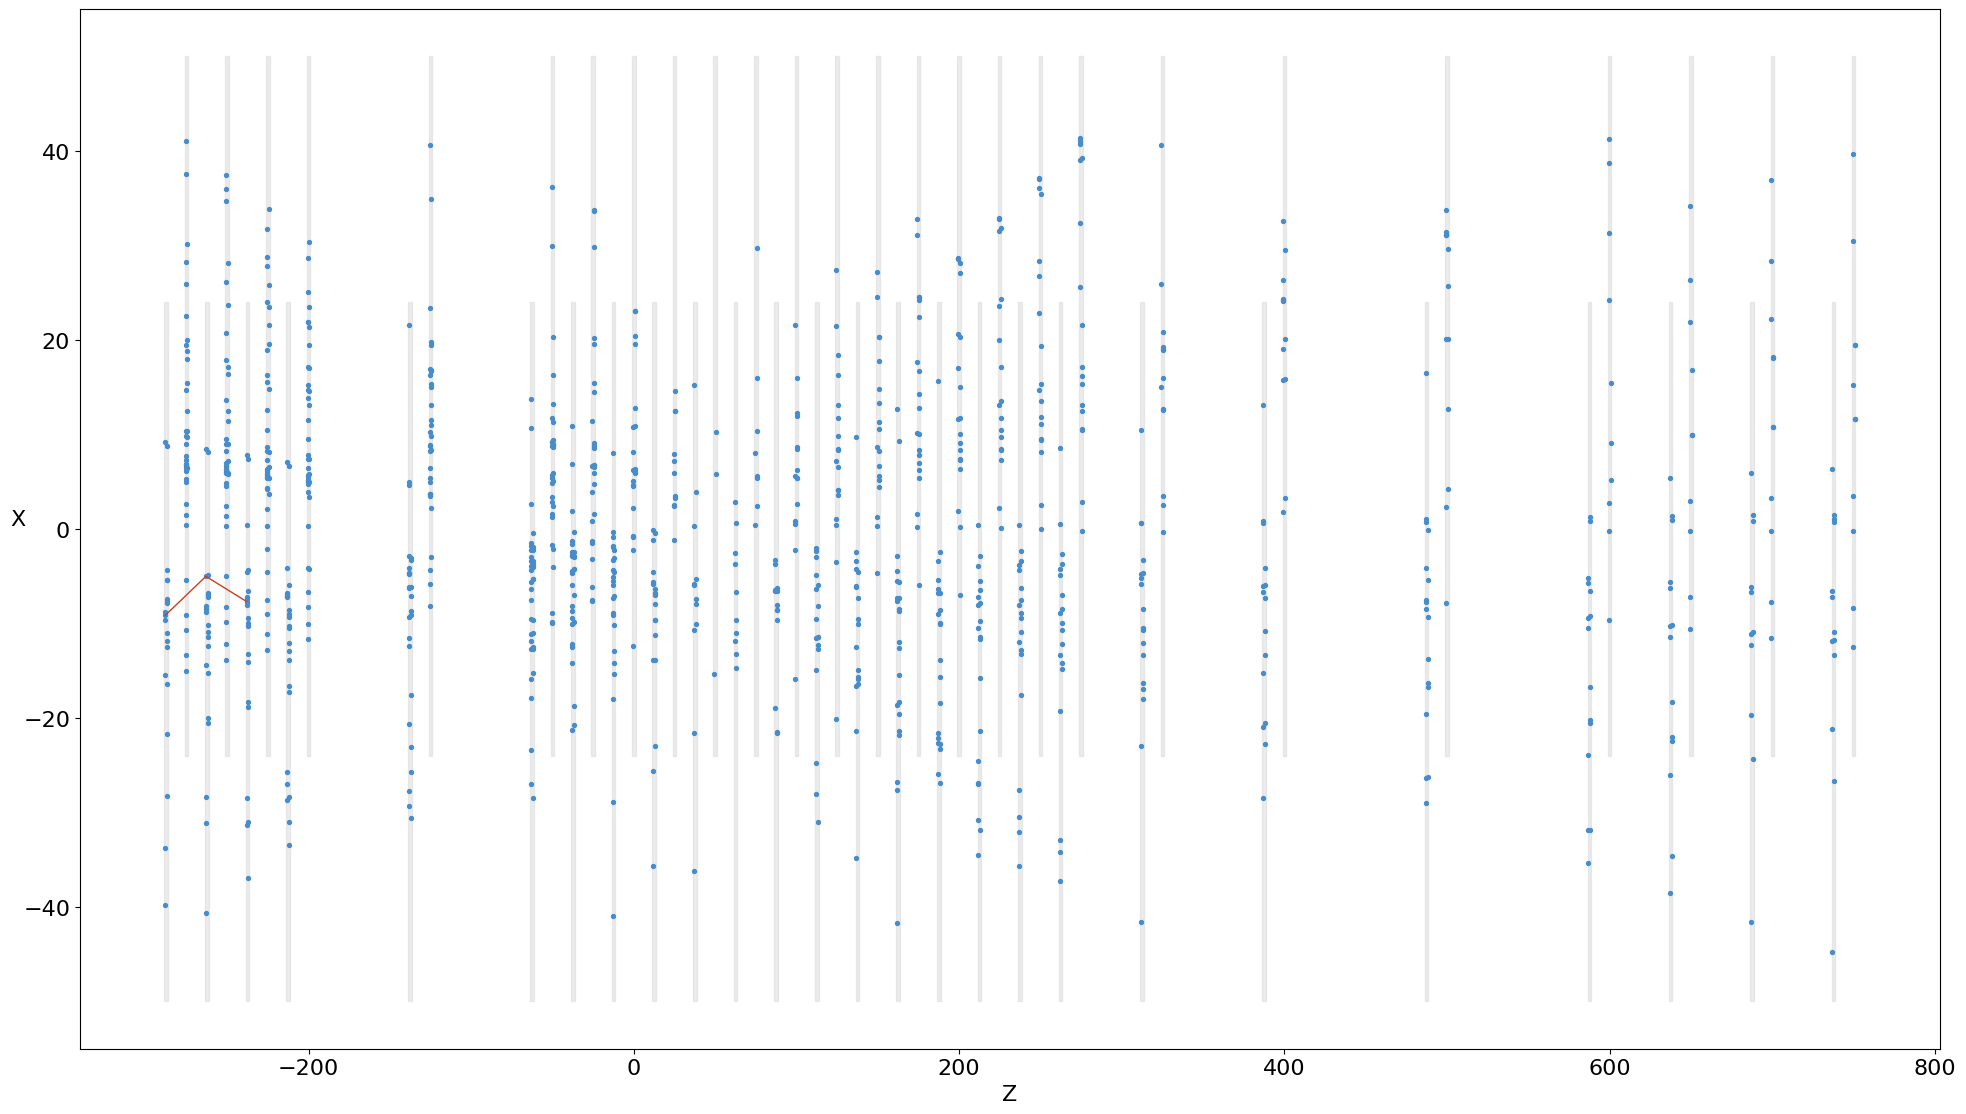

In [92]:
# Get hits from each module
hitp = event.modules[0].hits()[1]
hiti = event.modules[2].hits()[1]
hito = event.modules[4].hits()[1]

track = em.track([hitp, hiti, hito])
print_event_2d(event, tracks=[track])

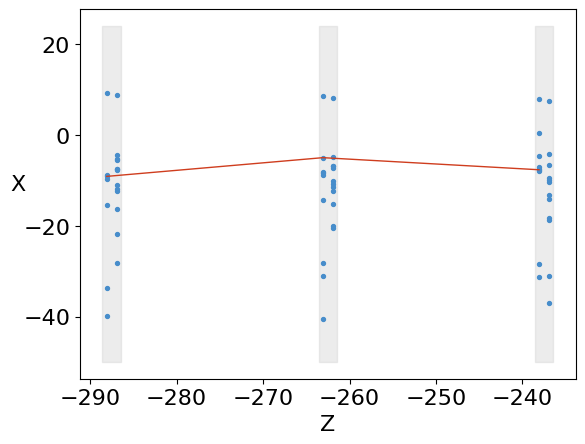

In [93]:
print_event_2d(event, tracks=[track], modules=[0,2,4])